In [2]:
# prompt: load /content/winequality.csv

import pandas as pd
df = pd.read_csv('/content/winequality.csv')

Feature Importances:
alcohol: 0.2708683143436185
sulphates: 0.14840565890119353
volatile_acidity: 0.11154663936447985
total_sulfur_dioxide: 0.07678564827910653
chlorides: 0.07113195656507873
pH: 0.06141843743303209
residual_sugar: 0.05789180861290351
fixed_acidity: 0.053186369906438206
density: 0.050816246759634046
citric_acid: 0.050752294281887524
free_sulfur_dioxide: 0.04719662555262754

Mean Squared Error: 0.30123812499999997
R-squared: 0.5390429623873638


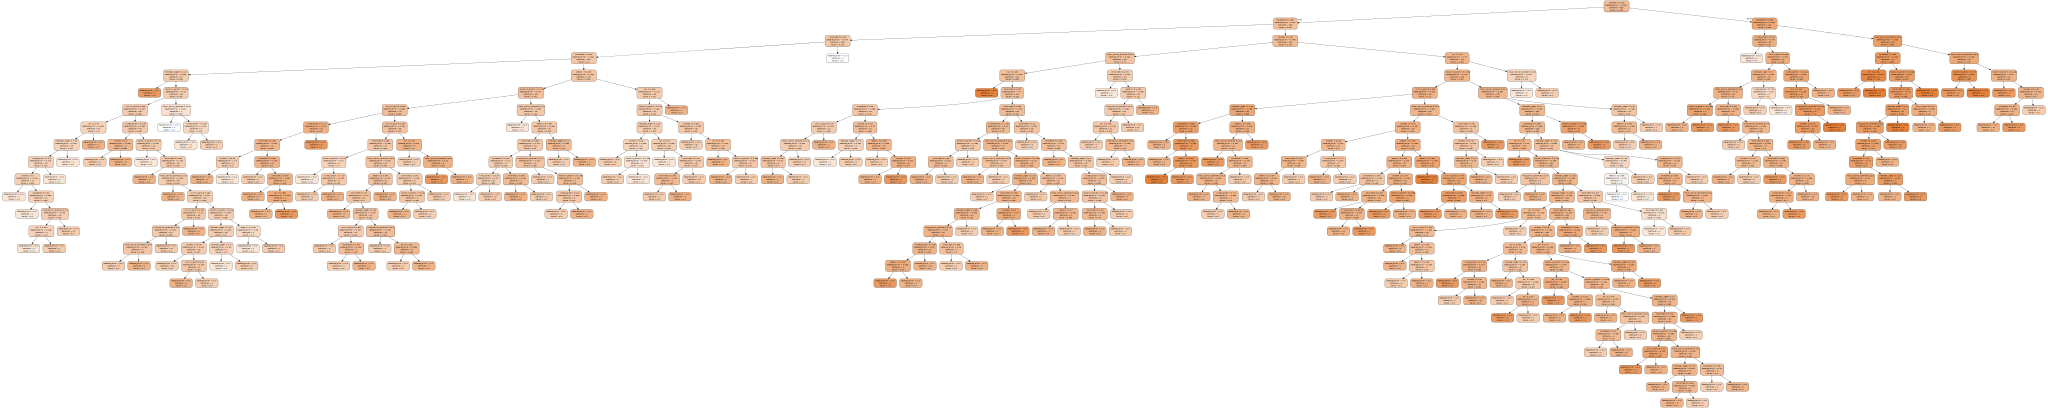

In [5]:
# Random Forest Regression with a target variable as 'quality' and all the other variables as the predictor variables. A summary of the output with model interpretation and a tree

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz
import numpy as np

# Separate target variable from features
y = df['quality']
X = df.drop('quality', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Model Interpretation (Feature Importance)
importances = rf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

print("Feature Importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]}")

# Summary of the output
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize a single tree from the forest
# Export a decision tree to a DOT file
estimator = rf.estimators_[0] # Visualize the first tree

dot_data = export_graphviz(estimator,
                           feature_names=X.columns,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)